# Data Science Intern at Let's Grow More LGMVIP Nov 21
# Intermediate Level Task
# Exploratory Data Analysis on Dataset - Terrorism
# Sachin Lohar

In [1]:
# Importing Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
# Connecting Google Drive with Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Importing Data Set from google drive
import os
os.chdir('/content/drive/My Drive')

In [16]:
# Reading Data set
data=pd.read_csv('globalterrorismdb_0718dist.csv', encoding ='latin1')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [17]:
# Describing the data
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [18]:
# Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [19]:
# Data Types
data.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [20]:
# Data Set Columns
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [21]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [22]:
# Taking out required Columns for Analysis
data=data[['eventid', 'iyear', 'imonth', 'country', 'region','provstate','city','crit1', 'crit2', 'crit3','success', 'suicide', 'attacktype1','targtype1','natlty1','gname','guncertain1','claimed','weaptype1','nkill','nwound']]
data.head()

,eventid,iyear,imonth,country,region,provstate,city,crit1,crit2,crit3,success,suicide,attacktype1,targtype1,natlty1,gname,guncertain1,claimed,weaptype1,nkill,nwound
0,197000000001,1970,7,58,2,NaN,Santo Domingo,1,1,1,1,0,1,14,58.0,MANO-D,0.0,NaN,13,1.0,0.0
1,197000000002,1970,0,130,1,Federal,Mexico city,1,1,1,1,0,6,7,21.0,23rd of September Communist League,0.0,NaN,13,0.0,0.0
2,197001000001,1970,1,160,5,Tarlac,Unknown,1,1,1,1,0,1,10,217.0,Unknown,0.0,NaN,13,1.0,0.0
3,197001000002,1970,1,78,8,Attica,Athens,1,1,1,1,0,3,7,217.0,Unknown,0.0,NaN,6,NaN,NaN
4,197001000003,1970,1,101,4,Fukouka,Fukouka,1,1,1,1,0,7,7,217.0,Unknown,0.0,NaN,8,NaN,NaN


In [23]:
# Returning Number of Missing values
data.isnull().sum()

eventid            0
iyear              0
imonth             0
country            0
region             0
provstate        421
city             434
crit1              0
crit2              0
crit3              0
success            0
suicide            0
attacktype1        0
targtype1          0
natlty1         1559
gname              0
guncertain1      380
claimed        66120
weaptype1          0
nkill          10313
nwound         16311
dtype: int64

In [24]:
# Combining Two Columns i.e., 'nkill' and 'nwound' into a new column 'casualities'
data['nkill']=data['nkill'].fillna(0)
data['nwound']=data['nwound'].fillna(0)
data['casualities']=data['nkill']+data['nwound']
data.isnull().sum()

eventid            0
iyear              0
imonth             0
country            0
region             0
provstate        421
city             434
crit1              0
crit2              0
crit3              0
success            0
suicide            0
attacktype1        0
targtype1          0
natlty1         1559
gname              0
guncertain1      380
claimed        66120
weaptype1          0
nkill              0
nwound             0
casualities        0
dtype: int64

In [25]:
data.describe()

,eventid,iyear,imonth,country,region,crit1,crit2,crit3,success,suicide,attacktype1,targtype1,natlty1,guncertain1,claimed,weaptype1,nkill,nwound,casualities
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,180132.000000,181311.000000,115571.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,131.968501,7.160938,0.988530,0.993093,0.875668,0.889598,0.036507,3.247547,8.439719,127.686441,0.081440,0.049666,6.447325,2.266860,2.883296,5.150156
std,1.325957e+09,13.259430,3.388303,112.414535,2.933408,0.106483,0.082823,0.329961,0.313391,0.187549,1.915772,6.653838,89.299120,0.273511,1.093195,2.173435,11.227057,34.309747,40.555416
min,1.970000e+11,1970.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,78.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,3.000000,83.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,98.000000,6.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,4.000000,101.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000
75%,2.014081e+11,2014.000000,9.000000,160.000000,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,14.000000,173.000000,0.000000,0.000000,6.000000,2.000000,2.000000,4.000000
max,2.017123e+11,2017.000000,12.000000,1004.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,22.000000,1004.000000,1.000000,1.000000,13.000000,1570.000000,8191.000000,9574.000000


In [31]:
print(f"""
There are {data.country.nunique()} Countries from {data.region.nunique()} Regions covered in the dataset terrorist attack data in {data.claimed.nunique()} years from {data.iyear.min()} to {data.iyear.max()}. Overall {data.index.nunique()} terrorist attacks are recorded here which caused about {data.casualities.sum()} Casualities Consisted of {data.nkill.sum()} Kills and {data.nwound.sum()} Wounded.
""")


There are 205 Countries from 12 Regions covered in the dataset terrorist attack data in 3 years from 1970 to 2017. Overall 181691 terrorist attacks are recorded here which caused about 935737.0 Casualities Consisted of 411868.0 Kills and 523869.0 Wounded.



# Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


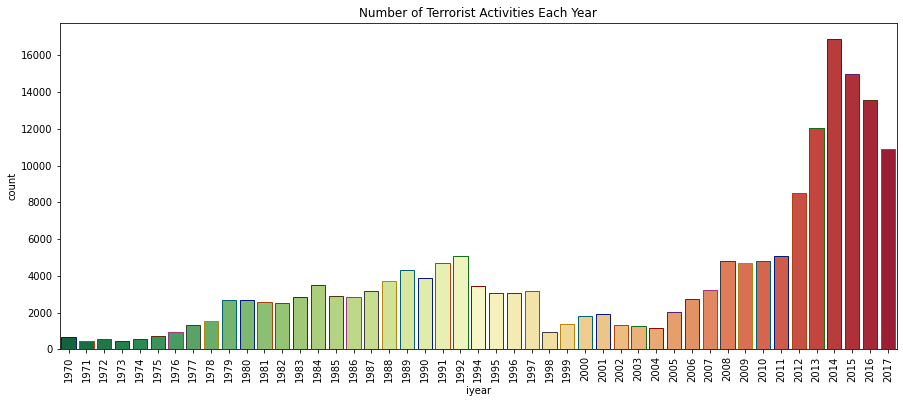

In [52]:
plt.subplots(figsize=(15,6))
sns.countplot('iyear', data=data, palette='RdYlGn_r', edgecolor=sns.color_palette('dark', 10))
plt.xticks(rotation = 90)
plt.title("Number of Terrorist Activities Each Year")
plt.show()

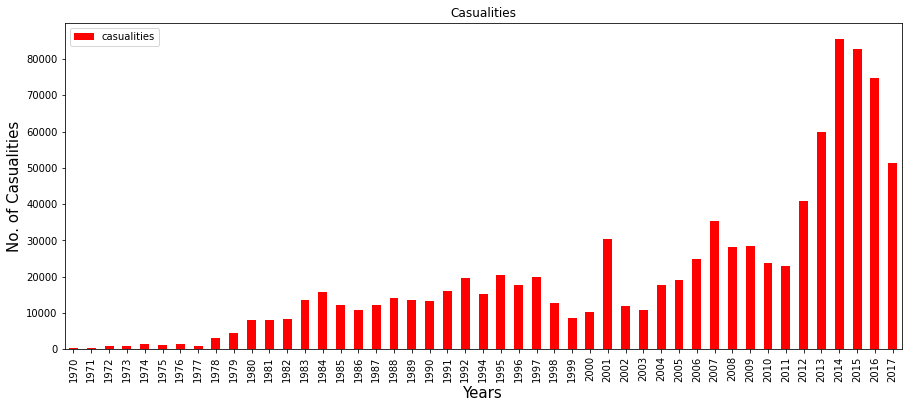

In [27]:
yearc=data[['iyear','casualities']].groupby('iyear').sum()
yearc.plot(kind='bar',color='red',figsize=(15,6))
plt.title("Casualities")
plt.xlabel('Years',fontsize=15)
plt.ylabel('No. of Casualities',fontsize=15)
plt.show()

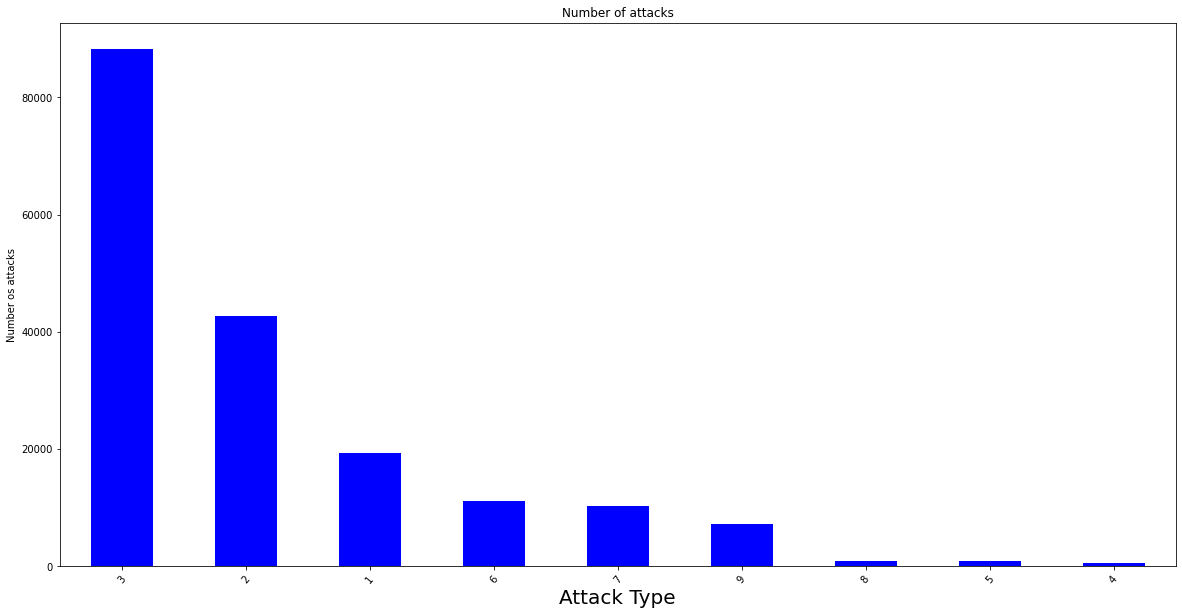

In [28]:
data['attacktype1'].value_counts().plot(kind='bar',figsize=(20,10),color='blue')
plt.xticks(rotation=50)
plt.xlabel('Attack Type',fontsize=20)
plt.ylabel('Number of attacks')
plt.title('Number of attacks')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


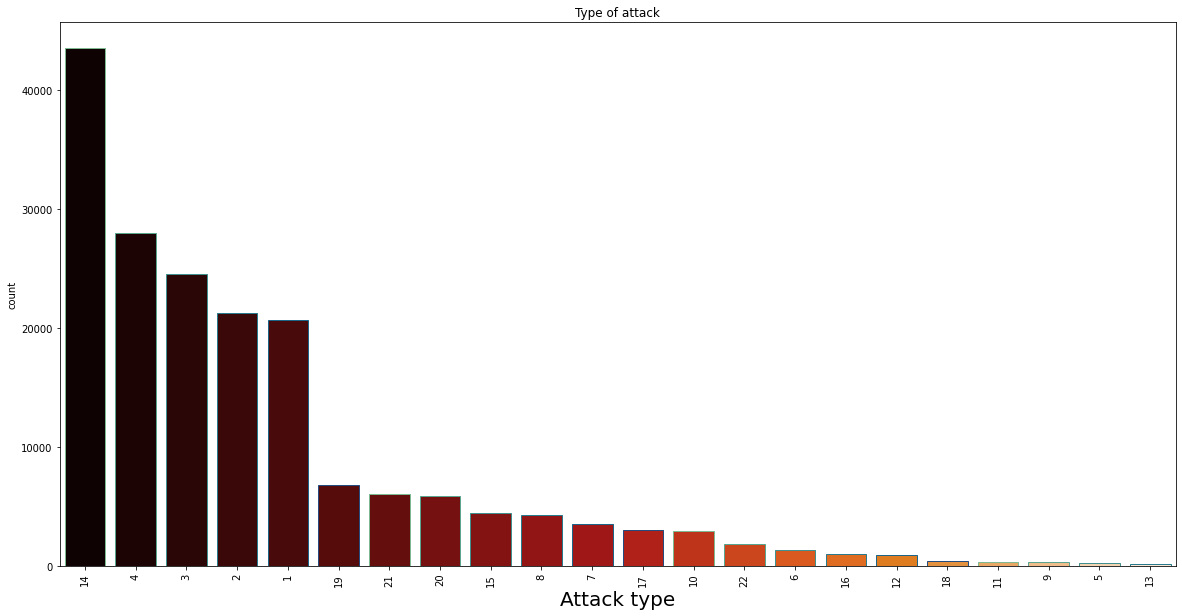

In [29]:
plt.subplots(figsize=(20,10))
sns.countplot(data['targtype1'],order=data['targtype1'].value_counts().index,palette='gist_heat',edgecolor=sns.color_palette("crest"));
plt.xticks(rotation=90)
plt.xlabel('Attack type',fontsize=20)
plt.ylabel('count')
plt.title('Type of attack')
plt.show()

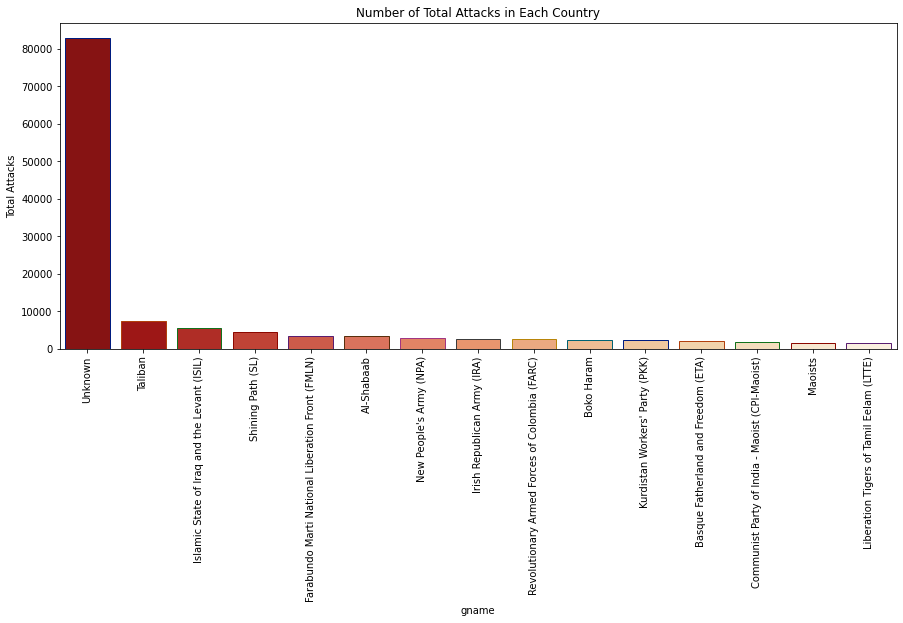

In [47]:
plt.subplots(figsize=(15,6))
country_attacks = data.gname.value_counts()[:15].reset_index()
country_attacks.columns = ['gname', 'Total Attacks']
sns.barplot(x = country_attacks.gname, y = country_attacks['Total Attacks'], palette='OrRd_r', edgecolor=sns.color_palette('dark', 10))
plt.xticks(rotation = 90)
plt.title("Number of Total Attacks in Each Country")
plt.show()

In [48]:
sattk=data.success.value_counts()[:10]
sattk

1    161632
0     20059
Name: success, dtype: int64

In [49]:
data.gname.value_counts()[1:11]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Name: gname, dtype: int64

# Conclusions
### There are 205 Countries from 12 Regions covered in the dataset terrorist attack data in 3 years from 1970 to 2017. Overall 181691 terrorist attacks are recorded here which caused about 935737.0 Casualities Consisted of 411868.0 Kills and 523869.0 Wounded.

1.Taliban has done most of attacks
2.Most of the attacks were made in the year 2014
3.bombing type attack were used most of time